## Reddit Mining

In this notebook we're going to use the Reddit API to get Reddit posts. Remember to insert your client id and other credentials in the code below.

Also, remember to install the praw library if you haven't already done so.

In [1]:
import praw

#We have to create a new instance of our reddit connection. You need to fill in these strings.

#For client_id use the long string under "personal use script" on your Reddit app.
#For client_secret use your secret Reddit key
#For password use your password
#For user_agent use an original name that you come up with, unique to your project
#For username use your username
reddit = praw.Reddit(client_id='JF7PQeivN-ij4g1p4AjuRw',
                     client_secret='1bkX79dhxJ7LTQQE-GdGzqnEn8GegA', 
                     password='CTS2023!!',
                     user_agent='It Paul', 
                     username='paul_barrett_cts')

#If you're correctly connected to the Reddit API, the following line of code will return your Reddit username.
#This is a good way to test if your credentials are correct.
print(reddit.user.me())

paul_barrett_cts


In [2]:
#To start working with PRAW, we need to create a reddit instance. Let's look at the posts in AITA
aita_subreddit = reddit.subreddit('AmItheAsshole')

#AITA_HOT and AITA_NEW store the hot & new posts in AITA.
aita_hot = aita_subreddit.hot()
aita_new = aita_subreddit.new()

Be warned: many of the posters in *Am I the Asshole* are, in fact, assholes. Be prepared for poor life choices and dark content:

#### submission_list and comment_list will store our posts and comments:
submission_list = []
comment_list = []

#For every comment in the hot list:
for submission in aita_hot:
    #We include this if statement because some Reddit posts are 'stickied' to the top of the forum
    #We want to ignore those, so let's do that:
    if not submission.stickied:

        #Let's print the submission title & the body (selftext)
        print("---------SUBMISSION---------")
        print(submission.title)
        print(submission.selftext)
        print("----------------------------")
        #Append that submission to our submission list
        submission_list.append(submission.selftext)
        #Store the comments and loop through each comment:
        comments = submission.comments
        
        #for comment in comments:
            #Append this comment to the comment_list
            #comment_list.append(comment.body)

            #A number of Reddit posts include "Welcome to..." to introduce the post / forum
            #We don't want to include those in our comment list:
            #if "Welcome to" not in comment.body:
                #Occasionally comments don't have a 'body' (they're spam, they're ads, etc)
                #So we use try / except to ensure the code doesn't crash in those cases.
            #    try:
            #        print("------------------COMMENT--------------------")
            #        print(comment.body)
            #    except:
            #        break

Who are the assholes? The posters or the commenters?

In the following code section, calculate the positive and negative sentiment scores of at least 10 posts and at least 50 comments. Who is more positive, who is more negative? Does this exercise tell you anything about the process of sentiment analysis?

In this following code section, we're going to load our Reddit posts into a Dataframe

In [7]:
#In this case we're going to look at the far nicer (most of the time) people of /r/python
py_subreddit = reddit.subreddit('python')

#As we read our forum, we'll store the relevant details in these three temporary lists.
py_title = []
py_upvotes = []
py_comments = []

#For every submission in top posts (max 200 posts)
for submission in py_subreddit.top(limit=200):
    py_title.append(submission.title)
    py_upvotes.append(submission.score)
    py_comments.append(submission.num_comments)


In [9]:
import pandas
#Now let's create a new dataframe, using our temporary lists as the values of our data:
py_dataframe = pandas.DataFrame(
    {'title': py_title,
     'num_comments': py_comments,
     'num_upvotes': py_upvotes,
    })

py_dataframe.head(10)

,title,num_comments,num_upvotes
0,Lad wrote a Python script to download Alexa vo...,133,12349
1,This post has:,437,9237
2,I redesign the Python logo to make it more modern,266,7861
3,Automate the boring stuff with python - tinder,328,6727
4,Just finished programming and building my own ...,469,6614
5,"I'm excited to share my first published book, ...",249,6500
6,Drawing Mona Lisa with 256 circles using evolu...,121,5727
7,I made a simulation using Python in which a ne...,212,5690
8,"Thanks to everyone’s advice, my mouse drawing ...",203,5548
9,Debugging Cheat Sheet,112,5454


## 'Listening' in on Reddit:

Let's say instead of just getting what's posted on Reddit now, we wanted to collect posts on Reddit as they happen. We can do that using PRAW by calling the 'stream' method. Note that this code will never actually stop running: it connects to Reddit and just keeps adding comments until the internet eventually dies. 

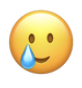

This code is adapted from the PRAW Python tutorial; you can read it here:

https://pythonprogramming.net/streaming-python-reddit-api-wrapper-praw-tutorial/?completed=/parsing-comments-python-reddit-api-wrapper-praw-tutorial/


In [ ]:
pretend = {}


In [ ]:
#So we're going to load posts from the 'news' forum.
news_reddit = reddit.subreddit('news')

#Note that we're looping through the comments in /r/news. Imagine actually deciding to collect the comments:
for comment in news_reddit.stream.comments():
    #We have to use a try / except structure because sometimes a comment will have a weird structure
    #such that the code under 'try' won't work how we want it to.
    try:
        print('-----------------------------------------------------------')
        print()
        parent_id = str(comment.parent())
        submission = reddit.comment(parent_id)
        print('Parent:')
        print(submission.body)
        print('Reply')
        print(comment.body)
    except praw.exceptions.PRAWException as e:
        pass

You can use the above code if you'd like to build a dataset from a Reddit forum. Let it run and see how much data you get. 

**Note: You may want to write your results to a text file to ensure you don't lose them. To do so, read the following instructions on writing to files:

https://www.pythontutorial.net/python-basics/python-write-text-file/

In [ ]:
import os
import re

#Open the Shakespeare corpus:
Shakespeare = open("CompleteShakespeare.txt", encoding="utf-8").read()

#Function: break_into_sections: Breaks string into a list of equally-sized sections 
#input: string   -- the string to be divided
#input: sections -- the number of sections to break the string into
#output: section_list -- a list of strings
def break_into_sections(string, sections):
    #Create / reset our section_list
    section_list = []
    section_counter = 0
    #The length of each section = length of string / number of sections:
    section_length = (len(string) / sections)
    
    #Loop once for every section:
    while section_counter < sections:
        #beginning and end store the locations in the string where this section begins and ends
        beginning = int(0 + (section_length)*section_counter)
        end = int((section_length)*section_counter + section_length)
        #Append this string to the section list
        section_list.append(string[beginning:end])
        #Increment the section counter
        section_counter = section_counter + 1
    print(len(section_list))
    return section_list
    
section_list = break_into_sections(Shakespeare,10000)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentimentAnalyser = SentimentIntensityAnalyzer()

for section in section_list:
    if str(section).isupper() == 0:
        print(sentimentAnalyser.polarity_scores(section))

For some participation marks, can you edit the above code to figure out the happiest of all of Shakespeare's prose?